In [366]:
#importy
import csv
import sklearn
from rdkit.Chem import Descriptors as S
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import PandasTools, MolFromSmiles
from rdkit import DataStructs

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.mlab import PCA

from pandas import DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [367]:
#data - histamin H3 receptor Homo Sapiens, IC50 (574 hitu), zdroj chembl
H3_rec = open("bioactivity-H3rec_bezNA.csv")

In [368]:
H3_rec

<_io.TextIOWrapper name='bioactivity-H3rec_bezNA.csv' mode='r' encoding='UTF-8'>

In [369]:
#nacitam csv file jednotlive radky jako seznamy retezcu do seznamu
with open('bioactivity-H3rec_bezNA.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    raw_H3 = []
    for row in spamreader:
        raw_H3.append(row)

In [370]:
raw_H3

[['CMPD_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_VALUE'],
 ['CHEMBL2387288', 'CC1CCCN1C2CCN(C2)c3ccc(NC(=O)NCc4cccs4)cc3', '.1'],
 ['CHEMBL565007', 'COc1ccc2OC(C(C)S(=O)(=O)c2c1)c3ccc(OCCCN4CCCC4)cc3', '.4'],
 ['CHEMBL2387284',
  'CC1CCCN1C2CCN(C2)c3ccc(NC(=O)N4CCN(CC4)c5ccccc5)cc3',
  '.4'],
 ['CHEMBL558248',
  'C[C@@H]1[C@H](Oc2ccccc2S1(=O)=O)c3ccc(OCCCN4CCCC4)cc3',
  '.6'],
 ['CHEMBL2387293',
  'CC1CCCN1C2CCN(C2)c3ccc(NC(=O)Nc4ccc(Oc5ccccc5)cc4)cc3C',
  '.6'],
 ['CHEMBL1222593',
  'C(c1ccc(cc1)C(N2CCCN(CC2)C3CCC3)c4nnnn4Cc5ccccc5)n6cccn6',
  '.7'],
 ['CHEMBL478395', 'C[C@H]1CCCN(CCCOc2ccc(cc2)N3C(=Nc4ccccc4C3=O)C)C1', '.72'],
 ['CHEMBL455681', 'CN1C(=O)c2ccccc2N=C1c3ccc(OC4CCN(CC4)C5CCCC5)cc3', '.74'],
 ['CHEMBL3427242', 'C[C@@H]1CCCN1CCc2ccc(cc2)c3ccc(Cc4nnn[nH]4)cc3', '.78'],
 ['CHEMBL517937', 'CC1=Nc2ccc(F)cc2C(=O)N1c3ccc(OC4CCN(CC4)C5CCC5)cc3', '1.2'],
 ['CHEMBL477363', 'CC1=Nc2cccc(Cl)c2C(=O)N1c3ccc(OCCCN4CCCC4)cc3', '1.3'],
 ['CHEMBL484189',
  'COc1ccc2N=C(C)N(C(=O)c2c1)c3ccc(

In [371]:
len(raw_H3)

554

In [372]:
head = raw_H3[0]
head

['CMPD_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_VALUE']

In [373]:
raw_H3 = raw_H3[1:len(raw_H3)] #odstranit hlavicku

In [374]:
raw_H3

[['CHEMBL2387288', 'CC1CCCN1C2CCN(C2)c3ccc(NC(=O)NCc4cccs4)cc3', '.1'],
 ['CHEMBL565007', 'COc1ccc2OC(C(C)S(=O)(=O)c2c1)c3ccc(OCCCN4CCCC4)cc3', '.4'],
 ['CHEMBL2387284',
  'CC1CCCN1C2CCN(C2)c3ccc(NC(=O)N4CCN(CC4)c5ccccc5)cc3',
  '.4'],
 ['CHEMBL558248',
  'C[C@@H]1[C@H](Oc2ccccc2S1(=O)=O)c3ccc(OCCCN4CCCC4)cc3',
  '.6'],
 ['CHEMBL2387293',
  'CC1CCCN1C2CCN(C2)c3ccc(NC(=O)Nc4ccc(Oc5ccccc5)cc4)cc3C',
  '.6'],
 ['CHEMBL1222593',
  'C(c1ccc(cc1)C(N2CCCN(CC2)C3CCC3)c4nnnn4Cc5ccccc5)n6cccn6',
  '.7'],
 ['CHEMBL478395', 'C[C@H]1CCCN(CCCOc2ccc(cc2)N3C(=Nc4ccccc4C3=O)C)C1', '.72'],
 ['CHEMBL455681', 'CN1C(=O)c2ccccc2N=C1c3ccc(OC4CCN(CC4)C5CCCC5)cc3', '.74'],
 ['CHEMBL3427242', 'C[C@@H]1CCCN1CCc2ccc(cc2)c3ccc(Cc4nnn[nH]4)cc3', '.78'],
 ['CHEMBL517937', 'CC1=Nc2ccc(F)cc2C(=O)N1c3ccc(OC4CCN(CC4)C5CCC5)cc3', '1.2'],
 ['CHEMBL477363', 'CC1=Nc2cccc(Cl)c2C(=O)N1c3ccc(OCCCN4CCCC4)cc3', '1.3'],
 ['CHEMBL484189',
  'COc1ccc2N=C(C)N(C(=O)c2c1)c3ccc(OC4CCN(CC4)C5CCC5)cc3',
  '1.5'],
 ['CHEMBL515150', 'CC1=N

In [375]:
#seradit, iterovat, vyhodit obe slouceniny z dat pokud shoda v chemblid (odstraneni duplikatu)

raw_H3.sort(key=lambda x:x[0])

newl = []

    
bad=False
for k,l in enumerate(raw_H3):
    if k == 0:
        continue
    if l[0] != raw_H3[k-1][0]:
        if bad:
            bad = False
        else:
            newl.append(raw_H3[k - 1])
    else:
        bad = True
if not bad:
    newl.append(raw_H3[-1])
    
len(newl)
        

492

In [376]:
raw_H3 = newl

In [377]:
len(raw_H3)

492

In [378]:
#uprava sloupce aktivit na float
raw_H3_edit = []
for m in raw_H3:
    raw_H3_edit.append([m[0], m[1], float(m[2])])

In [379]:
len(raw_H3_edit)

492

In [380]:
def MW(mol):
    return S.MolWt(mol)
#jedna z fci Lipinskeho pravidel

In [381]:
def logP(mol):
    return S.MolLogP(mol)
#druha z fci Lipinskeho

In [382]:
def Hdonor(mol):
    return S.NumHDonors(mol)
#treti z fci Lipinskeho - donory vodikovych vazeb

In [383]:
def Hakceptor(mol):
    return S.NumHAcceptors(mol)
#ctvrta z fci Lipinskeho - akceptory vodikovych vazeb

In [384]:
#spocitat pro kazdou mlk lipinskeho pravidla
result1 = [[m[0], m[1], m[2], MW(ch.MolFromSmiles(m[1])), logP(ch.MolFromSmiles(m[1])), Hdonor(ch.MolFromSmiles(m[1])), Hakceptor(ch.MolFromSmiles(m[1]))] for m in raw_H3]

In [ ]:
#1. CLustrovani

In [385]:
#data s deskriptory pro clustering v inchlibu
result_desc = []
for m in raw_H3:
    mol = ch.MolFromSmiles(m[1])
    result_desc.append([m[0], MW(mol), logP(mol), Hdonor(mol), Hakceptor(mol)])

In [386]:
#metadata s aktivitami pro clustering v inchlibu
result_metadata = []
for m in raw_H3:
    result_metadata.append([m[0], float(m[2])])

In [387]:
len(result_desc)

492

In [388]:
len(result_metadata)

492

In [389]:
#bez smilesu a aktivit
result_desc



[['CHEMBL1082723', 390.24500000000006, 4.343700000000003, 3, 2],
 ['CHEMBL1091874', 317.78000000000003, 2.4097, 2, 6],
 ['CHEMBL1172774', 283.41900000000004, 3.992200000000002, 1, 2],
 ['CHEMBL1173391', 317.43600000000004, 4.535800000000004, 1, 2],
 ['CHEMBL1190', 258.4939999999999, 3.5196000000000023, 0, 0],
 ['CHEMBL1221424', 444.58300000000037, 3.305900000000002, 0, 7],
 ['CHEMBL1221429', 459.5980000000002, 2.730600000000001, 1, 7],
 ['CHEMBL1222433', 501.6790000000003, 3.2032000000000016, 0, 8],
 ['CHEMBL1222434', 500.69500000000033, 3.1228000000000016, 0, 8],
 ['CHEMBL1222435', 467.62100000000027, 4.161700000000003, 0, 7],
 ['CHEMBL1222436', 468.60900000000026, 3.556700000000002, 0, 8],
 ['CHEMBL1222499', 482.63600000000025, 3.8651200000000028, 0, 8],
 ['CHEMBL1222500', 484.6080000000003, 3.729420000000003, 0, 9],
 ['CHEMBL1222501', 499.68800000000033, 4.802920000000004, 0, 8],
 ['CHEMBL1222502', 486.6490000000003, 3.8895000000000026, 0, 9],
 ['CHEMBL1222593', 482.6360000000001, 3

In [390]:
result_metadata

[['CHEMBL1082723', 10000.0],
 ['CHEMBL1091874', 5800.0],
 ['CHEMBL1172774', 6.6],
 ['CHEMBL1173391', 347.0],
 ['CHEMBL1190', 820.0],
 ['CHEMBL1221424', 58.5],
 ['CHEMBL1221429', 3.0],
 ['CHEMBL1222433', 0.6],
 ['CHEMBL1222434', 0.5],
 ['CHEMBL1222435', 6.5],
 ['CHEMBL1222436', 1.2],
 ['CHEMBL1222499', 0.2],
 ['CHEMBL1222500', 9.2],
 ['CHEMBL1222501', 0.4],
 ['CHEMBL1222502', 3.6],
 ['CHEMBL1222593', 0.7],
 ['CHEMBL1222594', 5.9],
 ['CHEMBL1222595', 0.9],
 ['CHEMBL1222596', 12.0],
 ['CHEMBL1222662', 119.0],
 ['CHEMBL1222663', 98.0],
 ['CHEMBL1222664', 32.0],
 ['CHEMBL1222728', 900.0],
 ['CHEMBL1222729', 33.0],
 ['CHEMBL1222730', 102.0],
 ['CHEMBL1222805', 20000.0],
 ['CHEMBL1222806', 20000.0],
 ['CHEMBL1222807', 2742.0],
 ['CHEMBL1222808', 25.0],
 ['CHEMBL1222809', 31.0],
 ['CHEMBL1222870', 285.0],
 ['CHEMBL1222871', 738.0],
 ['CHEMBL1222872', 94.0],
 ['CHEMBL1222873', 47.0],
 ['CHEMBL1222945', 356.0],
 ['CHEMBL1222946', 2.2],
 ['CHEMBL1222947', 3.4],
 ['CHEMBL1222948', 1761.0],
 ['CHEM

result_desc

In [392]:
#pro clustrovani a heatmapu - ulozeni dat a metadat do csv
#deskriptory
out = open("/tmp/projekt_data.csv", "w")
out.write("ID,MW,logP,Hdonor,Hakceptor\n")
for m1,MW,logP,Hdonor,Hakceptor in result_desc:
    out.write("%s,%f,%f,%f,%f\n" % (m1, MW, logP, Hdonor, Hakceptor))
out.close()

In [393]:
#metadata
out = open("/tmp/projekt_metadata.csv", "w")
out.write("ID,activity\n")
for m1,activity in result_metadata:
    out.write("%s,%f\n" % (m1, activity))
out.close()

In [394]:
#2D struktury molekul
result_images = []
for m in raw_H3:
    mol = ch.MolFromSmiles(m[1])
    result_images.append([m[0],mol])

In [395]:
result_images[:10]

[['CHEMBL1082723', <rdkit.Chem.rdchem.Mol at 0x7f5c55278bc0>],
 ['CHEMBL1091874', <rdkit.Chem.rdchem.Mol at 0x7f5c41eb1b70>],
 ['CHEMBL1172774', <rdkit.Chem.rdchem.Mol at 0x7f5c55278c10>],
 ['CHEMBL1173391', <rdkit.Chem.rdchem.Mol at 0x7f5c55278c60>],
 ['CHEMBL1190', <rdkit.Chem.rdchem.Mol at 0x7f5c55278cb0>],
 ['CHEMBL1221424', <rdkit.Chem.rdchem.Mol at 0x7f5c55278d00>],
 ['CHEMBL1221429', <rdkit.Chem.rdchem.Mol at 0x7f5c55278d50>],
 ['CHEMBL1222433', <rdkit.Chem.rdchem.Mol at 0x7f5c55278da0>],
 ['CHEMBL1222434', <rdkit.Chem.rdchem.Mol at 0x7f5c55278df0>],
 ['CHEMBL1222435', <rdkit.Chem.rdchem.Mol at 0x7f5c55278e40>]]

In [396]:
len(result_images)

492

In [397]:
len(set([id for id, mol in result_images])) #duplikaty

492

In [398]:
#vykresleni molekul a ulozeni do pc jako obrazek
#j = 0
for mol_id,i in result_images:
    #j=j+1
    #filename = 'mol_id_' + str(j) + '.png'
    filename = 'mol_id_' + str(mol_id) + '.png'
    d.MolToFile(i, filename) 

In [ ]:
#2. PCA
#na stejném prostoru z předchozí části transformací získejte PCA matici 
#a použijte první dvě komponenty pro vykreslení grafu.

#chceme zahrnout grafy vsech ctyrech lipinskeho, tj pouzit PCA

In [399]:
dataframe = pd.DataFrame(result_desc,columns=["CMPD_CHEMBLID", "MW", "logP", "Hdonor", "Hakceptor"]) #"Hakceptor","Hdonor","MW","logP","TPSA","rot_bonds","heavy_atoms"])

In [400]:
dataframe[:10]

,CMPD_CHEMBLID,MW,logP,Hdonor,Hakceptor
0,CHEMBL1082723,390.245,4.3437,3,2
1,CHEMBL1091874,317.780,2.4097,2,6
2,CHEMBL1172774,283.419,3.9922,1,2
3,CHEMBL1173391,317.436,4.5358,1,2
4,CHEMBL1190,258.494,3.5196,0,0
5,CHEMBL1221424,444.583,3.3059,0,7
6,CHEMBL1221429,459.598,2.7306,1,7
7,CHEMBL1222433,501.679,3.2032,0,8
8,CHEMBL1222434,500.695,3.1228,0,8
9,CHEMBL1222435,467.621,4.1617,0,7


In [401]:
dataframe.set_index('CMPD_CHEMBLID', inplace=True) #oznaceni radku, inplace aby udelal na danem dataframe

In [402]:
dataframe

,MW,logP,Hdonor,Hakceptor
CMPD_CHEMBLID,,,,
CHEMBL1082723,390.245,4.34370,3,2
CHEMBL1091874,317.780,2.40970,2,6
CHEMBL1172774,283.419,3.99220,1,2
CHEMBL1173391,317.436,4.53580,1,2
CHEMBL1190,258.494,3.51960,0,0
CHEMBL1221424,444.583,3.30590,0,7
CHEMBL1221429,459.598,2.73060,1,7
CHEMBL1222433,501.679,3.20320,0,8
CHEMBL1222434,500.695,3.12280,0,8


In [403]:
pca1 = PCA(dataframe,standardize=True)

In [404]:
pca1.Y #jak se jednotlive promenne lisi 4D

array([[-1.55619247, -2.45414167,  1.04112558, -0.22528126],
       [-0.92257805,  0.67235979,  1.88614092,  1.29129737],
       [-2.25989119, -0.34509901, -0.8116266 ,  0.5053053 ],
       ..., 
       [-0.07309146, -0.70008755, -0.22595171,  0.13932795],
       [-0.25275796, -1.25584259,  1.10328341, -1.13965255],
       [-0.37754784,  0.3631883 ,  2.17556541, -0.29693999]])

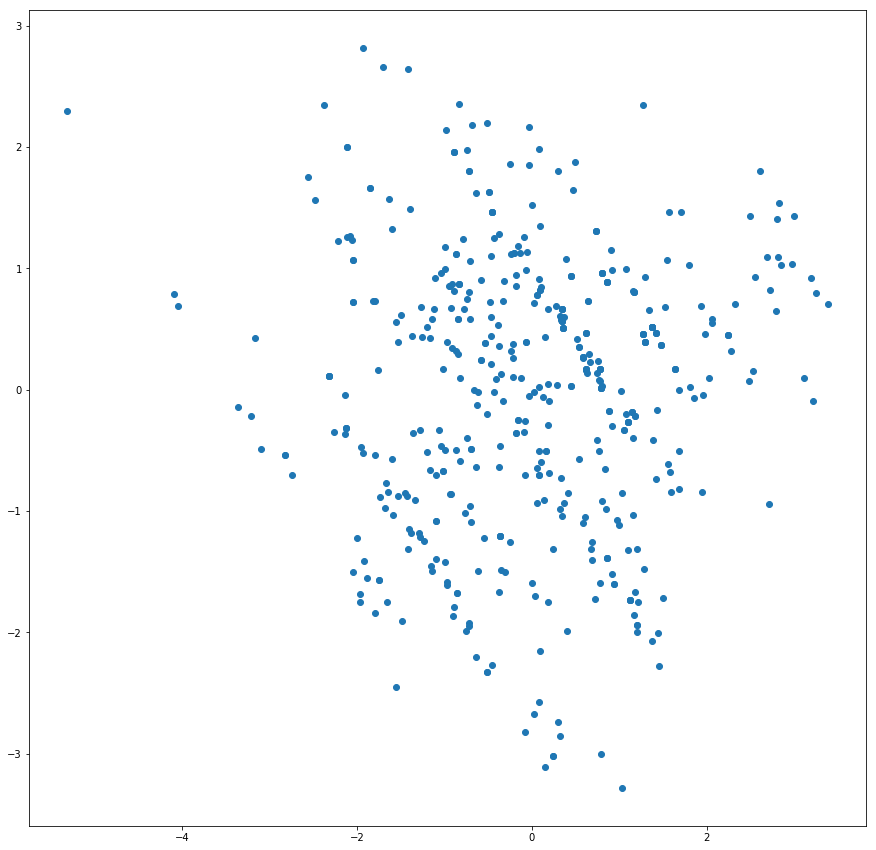

In [405]:
#graf vizualizace po dvojicich, prvni dve osy zachovavaji nejvic info
fig = plt.figure()
#plt.scatter(x,y) #x a y prvni dva rozmery

#dostat x a y
#udelat pole x a y, a z nich dostat x jako PC1 a y jako PC2 - druha hlavni komponenta
X = [x[0] for x in pca1.Y]
Y = [y[1] for y in pca1.Y]
plt.scatter(X,Y) #vytvori objekt

fig

In [406]:
pca1.s #prvni tri nam pokryji uz hodne

array([ 855.66983485,  627.24656634,  373.17418511,  107.90941369])

In [407]:
#3. predikce aktivity
#pomocí scikit-learn natrénujte model, který bude predikovat aktivitu pro vámi zvolený target. 
#Vaši sadu (asi náhodně) rozdělte na trénovací a testovací zhruba v poměru 70:30, 
#na trénovací sadě naučte nějaký model (doporučil bych RandomForest s Morganovým fingerprintem) 
#a sdělte nám přesnost na testovací sadě.


model_data = DataFrame(raw_H3_edit, columns=["id","smi","ic50"])
model_data.set_index("id", inplace=True)#vzit dle prvniho, vytvori dataframe (tabulku)
model_data[:10]


,smi,ic50
id,,
CHEMBL1082723,C[C@H]1Cc2c([nH]c3cc(Cl)c(F)cc23)[C@@]4(N1)C(=O)Nc5ccc(Cl)cc45,10000.0
CHEMBL1091874,CN[C@@H]1CCN(C1)c2nc(N)nc3c2oc4ccc(Cl)cc34,5800.0
CHEMBL1172774,CC(C)c1cccc(c1)N2CCC(Cc3c[nH]cn3)CC2,6.6
CHEMBL1173391,C(C1CCN(CC1)c2ccc(cc2)c3ccccc3)c4c[nH]cn4,347.0
CHEMBL1190,C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C,820.0
CHEMBL1221424,C(c1ccccc1)n2nnnc2C(N3CCCN(CC3)C4CCC4)c5ccc6OCCc6c5,58.5
CHEMBL1221429,CNC(=O)c1ccc(cc1)C(N2CCCN(CC2)C3CCC3)c4nnnn4Cc5ccccc5,3.0
CHEMBL1222433,C(N1CCOCC1)c2ccc(cc2)C(N3CCCN(CC3)C4CCC4)c5nnnn5Cc6ccccc6,0.6
CHEMBL1222434,CN1CCN(CC1)c2ccc(cc2)C(N3CCCN(CC3)C4CCC4)c5nnnn5Cc6ccccc6,0.5


In [408]:
desc_list = S.descList
desc_list

[('MinAbsEStateIndex', <function rdkit.Chem.EState.EState.MinAbsEStateIndex>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons>),
 ('MinAbsPartialCharge',
  <function rdkit.Chem.Descriptors.MinAbsPartialCharge>),
 ('MaxEStateIndex', <function rdkit.Chem.EState.EState.MaxEStateIndex>),
 ('MaxAbsEStateIndex', <function rdkit.Chem.EState.EState.MaxAbsEStateIndex>),
 ('MinEStateIndex', <function rdkit.Chem.EState.EState.MinEStateIndex>),
 ('MaxAbsPartialCharge',
  <function rdkit.Chem.Descriptors.MaxAbsPartialCharge>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons>),
 ('MaxPartialCharge', <function rdkit.Chem.Descriptors.MaxPartialCharge>),
 ('MinPartialCharge', <function rdkit.Chem.Descriptors.MinPartialCharge>),
 ('BalabanJ', <function rdkit.Ch

In [409]:
model_data["pic50"] = model_data.ic50.apply(lambda x : -1.0 * np.log10(x / 1.0e9))#novy sloupec s zaporne dek IC50



In [410]:
#vypocet deskriptoru (hodnoty)
for desc_name, function in desc_list:
    values = []
    for smiles in model_data["smi"]:
        mol = MolFromSmiles(smiles)
        values.append(function(mol))
    model_data[desc_name] = values #hodnoty pro dany descriptor se vlozi do sloupcu dataframu
# we convert the IC50 values to pIC50 which is defined as the negative logarithm
# with base 10 of the concentration in moles rather than nanomoles 

In [411]:
#list nazvu deskriptoru ktere budu pouzivat, vyber dle nejakych vlastnosti - feature selection - prvnich 30, toj e pravidlo
columns = [x[0] for x in desc_list[:30]] #pouze 30, omezit
columns

['MinAbsEStateIndex',
 'HeavyAtomMolWt',
 'NumRadicalElectrons',
 'MinAbsPartialCharge',
 'MaxEStateIndex',
 'MaxAbsEStateIndex',
 'MinEStateIndex',
 'MaxAbsPartialCharge',
 'ExactMolWt',
 'MolWt',
 'NumValenceElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1']

In [412]:
#rozdelit trenovaci a testovaci data na 70:30
train_data, test_data = train_test_split(model_data, test_size=0.3)

In [413]:
len(test_data)

148

In [414]:
len(train_data)

344

In [415]:
#klasifikujeme, forest regrese, ucime
#random forest vyhoda ze se nemusi predpripravovat data
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()#instance modelu, muzu zmenit n_estimators, =10 defaultne, kolik stromu v lese
model2.fit(train_data[columns], train_data["pic50"])#fitovani dat, jake data, na hodnotu na kterou natrenovat

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [416]:
#testujeme
model2.predict(test_data[columns])

array([ 7.47435686,  7.83930387,  7.97578331,  8.87668537,  5.58226454,
        5.70285682,  7.54791692,  5.9205509 ,  7.51191254,  8.53593026,
        7.79388046,  8.05352039,  4.47111695,  6.84340108,  8.13125177,
        9.25039507,  5.98949882,  8.63953285,  8.12015477,  7.86667856,
        6.46289885,  7.5326497 ,  8.50248599,  7.91098138,  8.21566088,
        6.16654111,  7.62386489,  7.72414123,  7.47782344,  7.43892599,
        5.61095577,  8.4229008 ,  8.36018479,  7.74954324,  6.39495089,
        5.668466  ,  6.57516714,  7.83292807,  8.16267514,  5.99749493,
        8.16267514,  6.09501835,  8.95667178,  5.20333597,  7.78564942,
        7.50473271,  6.94665053,  9.09212637,  6.81438845,  4.65759227,
        8.58466401,  5.5850792 ,  8.61126289,  7.84066009,  5.94862797,
        6.51008781,  6.37373516,  8.65067776,  8.93802351,  5.46547253,
        6.15385528,  8.6102726 ,  6.73771446,  8.06013887,  7.91867911,
        8.25864746,  8.5728981 ,  6.92374168,  9.03440056,  9.57

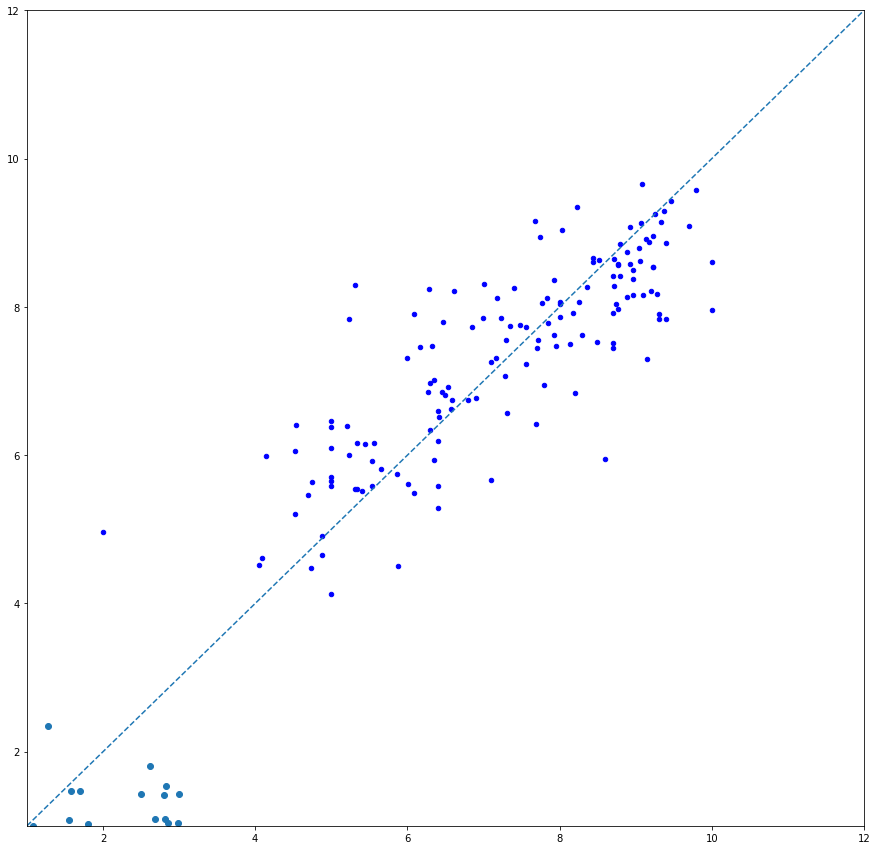

In [417]:
#graf nastavit zobrazeni (velikost ramecku a uhlovpricku)
plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')

#graficky overit
plt.scatter(
    test_data["pic50"]
    , model2.predict(test_data[columns])
    , c='blue'
    , s=20
)
plt.show()

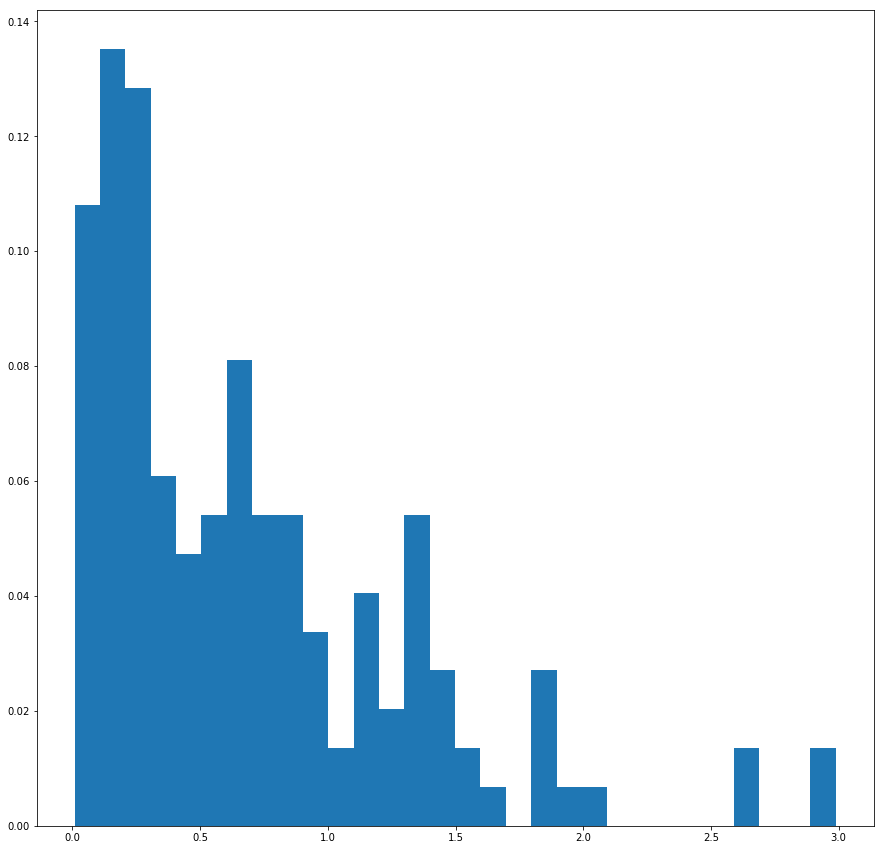

In [418]:
#skorovani modelu overit
errors = (test_data.pic50 - model2.predict(test_data[columns])).abs()
weights = np.ones_like(errors) / len(errors)
plt.hist(errors, weights=weights, bins=30)
plt.show()

In [419]:
#přesnost na testovací sadě- vypocet
print("R^2: %0.2f" % model2.score(test_data[columns], test_data.pic50))
print("R: %0.2f" % np.sqrt(model2.score(test_data[columns], test_data.pic50)))
print("MSE: %0.2f" %  mean_squared_error(model2.predict(test_data[columns]), test_data.pic50))

R^2: 0.68
R: 0.82
MSE: 0.86
